In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold

In [2]:
from google.colab import files
uploaded = files.upload()

Saving iris-data.csv to iris-data.csv


In [39]:
import io
data = pd.read_csv(io.BytesIO(uploaded['iris-data.csv']))
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [6]:
data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [10]:
data2 = data.replace("versicolor", "Iris-versicolor")

In [11]:
data2['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [12]:
data2.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
missing_values = data2[data2.isnull().any(axis=1)]
missing_values.shape

(5, 5)

In [15]:
m = len(missing_values.index)
m

5

In [23]:
p = m/len(data)*100
print("Percentage of missing rows is {:.2f} %".format(p))

Percentage of missing rows is 3.33 %


In [17]:
missing_values.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [22]:
m_p = missing_values.isna().sum()['petal_width_cm']/len(data2)*100
print("Percentage of missing rows is column is {:.2f} %".format(m_p))

Percentage of missing rows is column is 3.33 %


In [29]:
data_clean = data2.interpolate(inplace=False)

In [30]:
data_clean.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [34]:
data_clean

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**VISUALISATIONS**

In [36]:
data_plot = data_clean[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm','petal_width_cm','class']].groupby(['class']).agg('mean')
print(data_plot)


                 sepal_length_cm  sepal_width_cm  petal_length_cm  \
class                                                               
Iris-setosa             5.020408        3.410204         1.459184   
Iris-setossa            5.700000        3.800000         1.700000   
Iris-versicolor         5.353880        2.772000         4.260000   
Iris-virginica          6.546000        2.974000         5.552000   

                 petal_width_cm  
class                            
Iris-setosa            0.244898  
Iris-setossa           0.300000  
Iris-versicolor        1.326000  
Iris-virginica         2.034000  


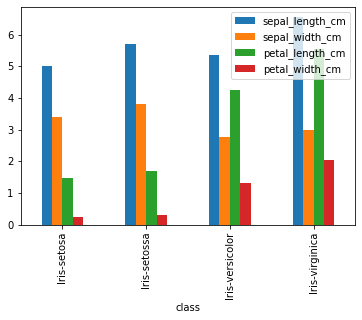

In [37]:
data_plot.plot.bar()

In [46]:
#We create x and y for our testing - on x all columns with data, on y categotries of data

x = data_clean.drop(['class'], axis=1)
y = data_clean['class']
# print(X.head())
print(x.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [47]:
#We perform randomise data for split into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=6)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [48]:
#we create samples for test and train

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold()
skf.get_n_splits(x, y)
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [50]:
#We create labels for data sets

for train_index, test_index in skf.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] TEST: [  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  18  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 120

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


------------- 1 -------------------
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
------------- 2 -------------------
[[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]
------------- 3 -------------------
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
------------- 4 -------------------
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
------------- 5 -------------------
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]
------------- 6 -------------------
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
------------- 7 -------------------
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
------------- 8 -------------------
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]
------------- 9 -------------------
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
------------- 10 -------------------
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
------------- 11 -------------------
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
------------- 12 -------------------
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
------------- 13 -------------------
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
------------- 14 -------------------
[[15  0  0

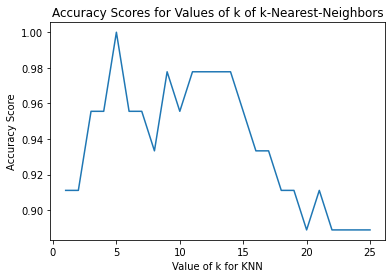

In [52]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    print ('-------------', k, '-------------------')
    print(metrics.confusion_matrix(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [54]:
  #To get accuracy of the knn model - we need to run above Accuracy Scores for Values of k of k-Nearest-Neighbors
  #After this, we need to manually check which "value of k for KNN" is closest to 1, and provide this valuie to n_neighbors - in below example it was 5)
  
  knn = KNeighborsClassifier(n_neighbors=5)
  knn.fit(x_train, y_train)
  y_pred_knn = knn.predict(x_test)
  print("The accuracy of the knn is","{:.3f}".format(metrics.accuracy_score(y_pred_knn,y_test)))

The accuracy of the knn is 1.000


In [55]:
#Decision Tree

tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
tree.fit(x_train,y_train)
prediction=tree.predict(x_test)
print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.933


In [56]:
tree.feature_importances_

array([0.03557897, 0.01940671, 0.02825389, 0.91676044])

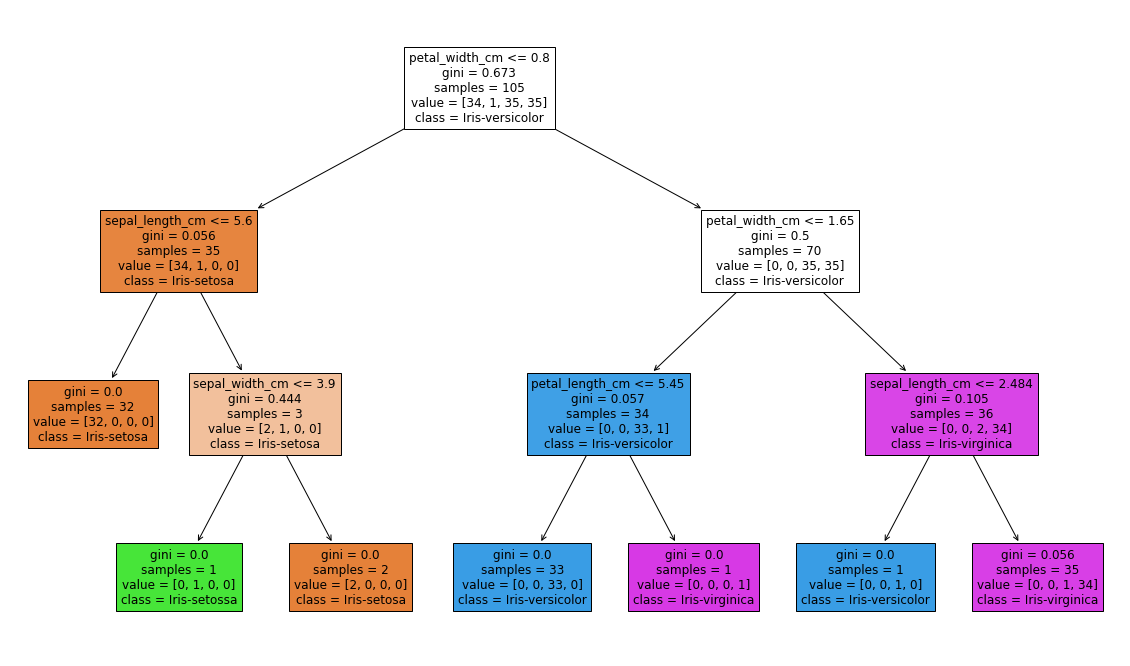

In [59]:
plt.figure(figsize = (20,12))
fn = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm','petal_width_cm']
cn = ['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'Iris-virginica']
plot_tree(tree, feature_names = fn, class_names = cn, filled = True);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


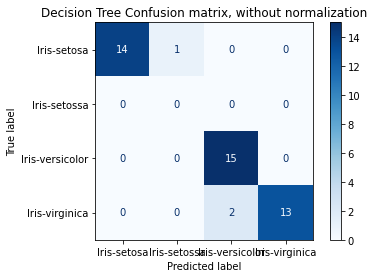

In [60]:
cm = metrics.plot_confusion_matrix(tree, x_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
cm.ax_.set_title('Decision Tree Confusion matrix, without normalization');

In [61]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

The accuracy for Radius Neighbors Classifier is: 93.33333333333333 %

The classification report for Radius Neighbors Classifier is:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.83      1.00      0.91        15
 Iris-virginica       1.00      0.80      0.89        15

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



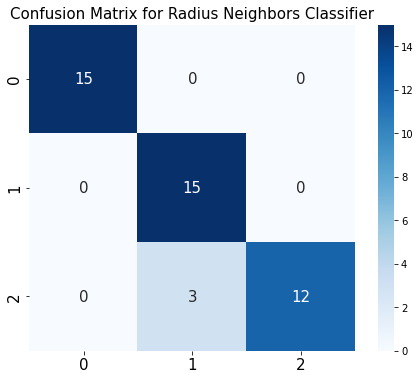

In [62]:
from sklearn.neighbors import RadiusNeighborsClassifier
rnc = RadiusNeighborsClassifier()
rnc.fit(x_train, y_train)
y_pred = rnc.predict(x_test)
acc_rnc = rnc.score(x_test, y_test)
print('The accuracy for Radius Neighbors Classifier is:', acc_rnc * 100, "%")
generate_results(rnc, y_pred, 'Radius Neighbors Classifier')

In [63]:
from sklearn.ensemble import RandomForestClassifier

The accuracy of the Random Forest Classifier is: 93.33333333333333 %

The classification report for Random Forest Classifier is:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.83      1.00      0.91        15
 Iris-virginica       1.00      0.80      0.89        15

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



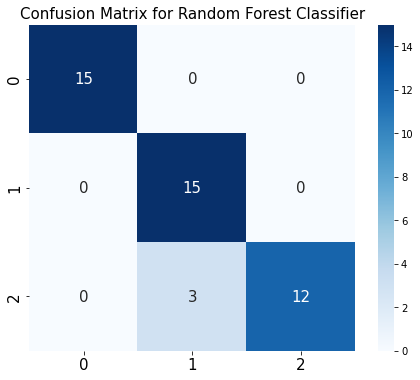

In [64]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [66]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [67]:
y_pred = lr.predict(x_test)
# Predict probabilities
probs_y=lr.predict_proba(x_test)
### Print results 
probs_y = np.round(probs_y, 2)

The accuracy of the Logistic Regression is: 93.33333333333333 %

The classification report for Logistic Regression is:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.83      1.00      0.91        15
 Iris-virginica       1.00      0.80      0.89        15

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



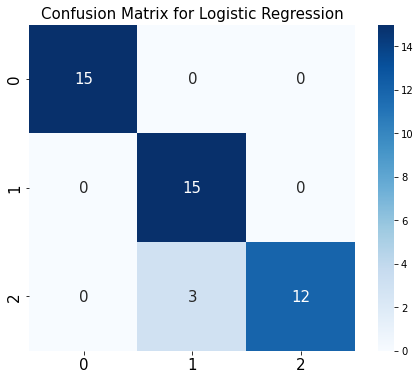

In [68]:
print('The accuracy of the Logistic Regression is:', lr.score(x_test, y_test) * 100, '%')
generate_results(lr, y_pred, 'Logistic Regression')